# MDI220
# Statistiques

# Mini-project 

Ce mini-projet est pour le cours Statistiques MDI220.

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import norm, chi2, gaussian_kde

In [4]:
import seaborn as sns

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023.

In [169]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [170]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [171]:
regions = list(df.region.unique())

In [172]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [173]:
# average consumption per region
df[["region", "consumption"]].groupby("region").var().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,2114009
Bourgogne-Franche-Comté,252927
Bretagne,365956
Centre-Val de Loire,271286
Grand Est,893465
Hauts-de-France,1009844
Normandie,456483
Nouvelle-Aquitaine,1096420
Occitanie,882563


In [174]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int64

In [175]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

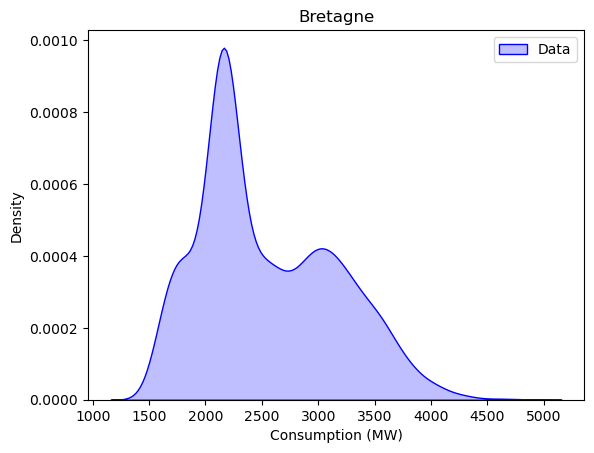

In [176]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne. 

1. Montrez que les estimateur pour la moyenne et la variance sont sans biais.

Votre réponse : 

Soit X une variable aléatoire de variance ${\sigma^2}$ et de moyenne $\mu$. On veut montrer que les estimateurs de la variance et de la moyenne ci-dessus sont sans biais, c'est-à-dire $E(\hat \mu) = \mu$ et $E(\hat{\sigma^2}) = {\sigma^2}$.

Moyenne :
$$
E(\hat \mu) = E(\frac 1 n \sum_{i=1}^n X_i) = \frac 1 n \sum_{i=1}^n E(X_i) = \frac n n * \mu = \mu
$$
Variance : 
$$
E(\hat{\sigma^2}) = \frac n {n-1} E((X_1 - \hat \mu)^2) 
$$
$$
= \frac n {n-1} (E(X_1 ^2) -2 E(X_1\hat \mu) + E(\hat \mu ^2))
$$
$$
= \frac n {n-1} ((\sigma^2 + \mu^2) - \frac 2 n \sum_{i=1}^n E( X_1 X_i) + (Var(\hat \mu) + \mu ^2))
$$
$$
= \frac n {n-1} ((\sigma^2 + \mu^2) - \frac 2 n (\sigma^2 + \mu^2 + (n-1) \mu^2) + (\frac {\sigma^2} n + \mu^2))
$$
$$
= \frac n {n-1} (\sigma^2 \frac {n-1} n + \mu^2 (2-2)) = \sigma^2
$$

Ces estimateurs sont donc sans biais.

2. Donnez les valeurs obtenues pour la moyen et pour la variance en utilisant ces estimateurs.

In [177]:
x_i = df.query("region == 'Bretagne'")["consumption"]
sample_size = x_i.count()
mu = x_i.sum() / sample_size

sigma = (1 / (sample_size-1)) * ((x_i - mu)**2).sum()

print ('Sigma = ',sigma)
print('Mu = ',mu)


Sigma =  365956.0141448174
Mu =  2546.536155666579


3. Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

In [178]:
gaussian_data = np.random.normal(mu, np.sqrt(sigma), sample_size)

4. Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

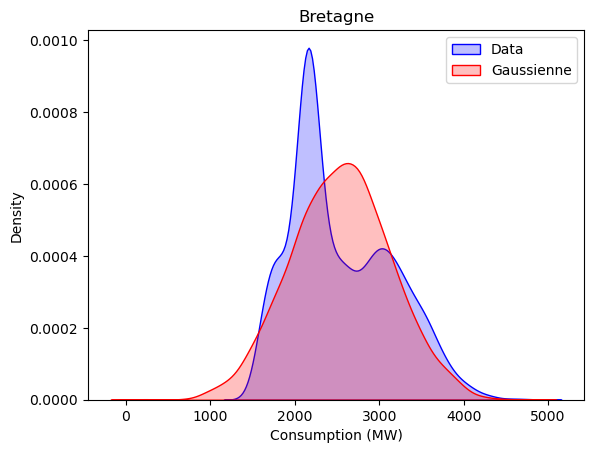

In [179]:
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
sns.kdeplot(data=gaussian_data, label="Gaussienne", color='red', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

5. Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

Sigma =  164979.9064431681
Mu =  3214.358595194085


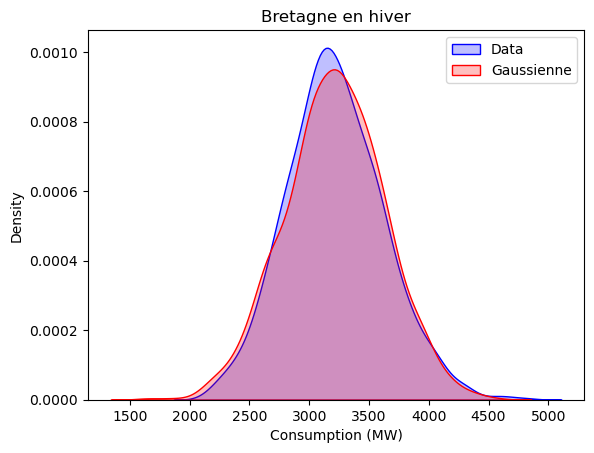

In [149]:
def isWinter (date):
    date_array = [int(numeric_string) for numeric_string in date.split('-')]
    if (date_array[1] == 12 and date_array[2] >= 12):
        return True
    elif (date_array[1] < 3):
        return True
    elif (date_array[1] == 3 and date_array[2] <=21):
        return True
    return False

region = "Bretagne"
df_region = df[df.region == region]
winter_bretagne = df_region.loc[df_region['date'].apply(isWinter)]

x_i = winter_bretagne["consumption"]
sample_size = x_i.count()
mu = x_i.sum() / sample_size

sigma = (1 / (sample_size-1)) * ((x_i - mu)**2).sum()

print ('Sigma = ',sigma)
print('Mu = ',mu)

gaussian_data = np.random.normal(mu, np.sqrt(sigma), sample_size)

sns.kdeplot(data=winter_bretagne, x="consumption", label="Data", color='blue', fill=True)
sns.kdeplot(data=gaussian_data, label="Gaussienne", color='red', fill=True)
plt.title("Bretagne en hiver")
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()


6. Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

In [150]:
#Il est clair que dans le second cas, la gaussienne est plus proche des observations. 
#Le modèle gaussien est donc plus pertinent dans ce cas.

## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctionnes de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

Votre réponse : 

$f$ et $g$ sont des fonctions de densités, elles sont $\geq 0$ et leur intégrals est égale à $1$. 

**1) Montrons tout d'abord** $d(f,g) \in [0,1]$: 

$$
|f(x) - g(x)| \leq f(x) + g(x) \Rightarrow  d(f,g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx \leq \frac 1 2 \int f(x) + g(x) \mathrm dx = \frac 1 2 (\int f(x) \mathrm dx + \int g(x) \mathrm dx) = 1
$$
De plus, 
$$
|f(x) - g(x)| \geq 0 \Rightarrow d(f,g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx \geq 0
$$
On a bien $d(f,g) \in [0,1]$.

**2) Montrons que** $d(f, g) = 0 \iff f = g$.

**$\Rightarrow$** : Par l'absurde, supposons qu'il existe des fonctions $f$ et $g$ telles que $d(f, g) = 0$ et $f \neq g$ sur un intervalle non $\mu$-négligeable que nous appellerons $I$. Si $|f(x) - g(x)| > 0$ pp (presque partout), l'intégrale de cette fonction sur un intervalle $A$ est plus grande ou égale que son intégrale sur tout sous-ensemble de $A$. Puisque $g(x) \neq f(x)$ sur $I$, alors $|f(x) - g(x)| > 0$ sur $I$ et donc $\frac{1}{2} \int |f(x) - g(x)| \, \mathrm{d}x > 0$ sur $I$. Il en résulte que $d(f, g) \neq 0$, ce qui contredit notre supposition.

**$\Leftarrow$** : C'est trivial, car si $f(x) = g(x)$ pp, alors $|f(x) - g(x)| = 0$ pp, ce qui implique $d(f, g) = 0$.


**3) Montrons que** $d(f, g) = 1 \iff f$ et $g$ sont à support disjoints.

**$\Rightarrow$** : $\frac{1}{2} \int |f(x) - g(x)| \, \mathrm{d}x = 1 \iff \int |f(x) - g(x)| \, \mathrm{d}x = 2$. Si $f$ et $g$ sont à support disjoints, alors $|f(x) - g(x)| < f(x) + g(x)$, ce qui implique $\int f(x) + g(x) \, \mathrm{d}x > 2$. Cependant, cela n'est pas possible car $f$ et $g$ sont des densités (voir 1).

**$\Leftarrow$** : Si $f$ et $g$ sont à support disjoints, alors $|f(x) - g(x)| = f(x) + g(x)$, comme dans le premier cas de 1.


2. Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

In [151]:
import scipy.integrate as integrate

region = "Bretagne"
df_bretagne = df[df.region == region]

x_i = df.query("region == 'Bretagne'")["consumption"]
sample_size = x_i.count()
mu = x_i.sum() / sample_size

sigma = (1 / (sample_size-1)) * ((x_i - mu)**2).sum()

kde_data_bretagne = sns.kdeplot(df_bretagne, cut=0).get_lines()[0].get_data()
plt.close()
def integrand(x) :
    return np.abs(np.interp(x, kde_data_bretagne[0], kde_data_bretagne[1]) - norm.pdf(x, mu, np.sqrt(sigma)))
dissimilarity, _ = integrate.quad(integrand, min(x_i), max(x_i))
dissimilarity /= 2
print ("Mesure de dissimilarité de la bretagne : ", dissimilarity)

Mesure de dissimilarité de la bretagne :  0.16171494356259636


/var/folders/bt/d1544_zx4mv6h8fnx8jsvq9r0000gn/T/ipykernel_39872/2983834636.py:16: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  dissimilarity, _ = integrate.quad(integrand, min(x_i), max(x_i))


3. Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

In [152]:
def isWinter (date):
    date_array = [int(numeric_string) for numeric_string in date.split('-')]
    if (date_array[1] == 12 and date_array[2] >= 12):
        return True
    elif (date_array[1] < 3):
        return True
    elif (date_array[1] == 3 and date_array[2] <=21):
        return True
    return False

region = "Bretagne"
df_region = df[df.region == region]
winter_bretagne = df_region.loc[df_region['date'].apply(isWinter)]

x_i = winter_bretagne["consumption"]
sample_size = x_i.count()
mu = x_i.sum() / sample_size

sigma = (1 / (sample_size-1)) * ((x_i - mu)**2).sum()

kde_data_bretagne_hiver = sns.kdeplot(winter_bretagne, cut=0).get_lines()[0].get_data()
plt.close()
def integrand(x) :
    return np.abs(np.interp(x, kde_data_bretagne_hiver[0], kde_data_bretagne_hiver[1]) - norm.pdf(x, mu, np.sqrt(sigma)))
dissimilarity, _ = integrate.quad(integrand, min(x_i), max(x_i))
dissimilarity /= 2
print ("Mesure de dissimilarité de la bretagne : ", dissimilarity)

Mesure de dissimilarité de la bretagne :  0.02959662580813538


/var/folders/bt/d1544_zx4mv6h8fnx8jsvq9r0000gn/T/ipykernel_39872/2150902556.py:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  dissimilarity, _ = integrate.quad(integrand, min(x_i), max(x_i))


4. Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

In [153]:
def isWinter (date):
    date_array = [int(numeric_string) for numeric_string in date.split('-')]
    if (date_array[1] == 12 and date_array[2] >= 12):
        return True
    elif (date_array[1] < 3):
        return True
    elif (date_array[1] == 3 and date_array[2] <=21):
        return True
    return False

df_winter = df.loc[df['date'].apply(isWinter)]

dissimilarity_list = []

for region in regions :
    df_region_winter = df_winter[df_winter.region == region]

    x_i = df_region_winter["consumption"]
    sample_size = x_i.count()
    mu = x_i.sum() / sample_size
    sigma = (1 / (sample_size-1)) * ((x_i - mu)**2).sum()
    kde_data_region_hiver = sns.kdeplot(df_region_winter, cut=0).get_lines()[0].get_data()
    plt.close()
    integrand = lambda x: np.abs(np.interp(x, kde_data_region_hiver[0], kde_data_region_hiver[1]) - norm.pdf(x, mu, np.sqrt(sigma)))
    dissimilarity, _ = integrate.quad(integrand, min(x_i), max(x_i))
    dissimilarity /= 2
    dissimilarity_list.append(dissimilarity)
    
df_dissimilarity = pd.DataFrame({"Régions" : regions, "Dissimilarité": dissimilarity_list})

print(df_dissimilarity)
    

/var/folders/bt/d1544_zx4mv6h8fnx8jsvq9r0000gn/T/ipykernel_39872/3765546592.py:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  dissimilarity, _ = integrate.quad(integrand, min(x_i), max(x_i))
/var/folders/bt/d1544_zx4mv6h8fnx8jsvq9r0000gn/T/ipykernel_39872/3765546592.py:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  

                       Régions  Dissimilarité
0         Auvergne-Rhône-Alpes       0.042044
1      Bourgogne-Franche-Comté       0.042033
2                     Bretagne       0.029597
3          Centre-Val de Loire       0.038131
4                    Grand Est       0.040869
5              Hauts-de-France       0.024808
6                    Normandie       0.041975
7           Nouvelle-Aquitaine       0.047628
8                    Occitanie       0.054635
9             Pays de la Loire       0.034532
10  Provence-Alpes-Côte d'Azur       0.031054
11               Île-de-France       0.045613


/var/folders/bt/d1544_zx4mv6h8fnx8jsvq9r0000gn/T/ipykernel_39872/3765546592.py:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  dissimilarity, _ = integrate.quad(integrand, min(x_i), max(x_i))


5. Quelle région a le meilleur *fit* avel le modèle gaussien en hiver ?

In [154]:
best_fit = df_dissimilarity["Dissimilarité"].min()
best_fit_region = df_dissimilarity[df_dissimilarity["Dissimilarité"] == best_fit]

print(f"Le meilleur fit avec le modèle gaussien en hiver est {best_fit_region.iat[0,0]} avec un indice de {best_fit_region.iat[0,1]}")

Le meilleur fit avec le modèle gaussien en hiver est Hauts-de-France avec un indice de 0.024807950283614922


6. Pour ces région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

Sigma =  1098952.8860326493
Mu =  9078.930683918668


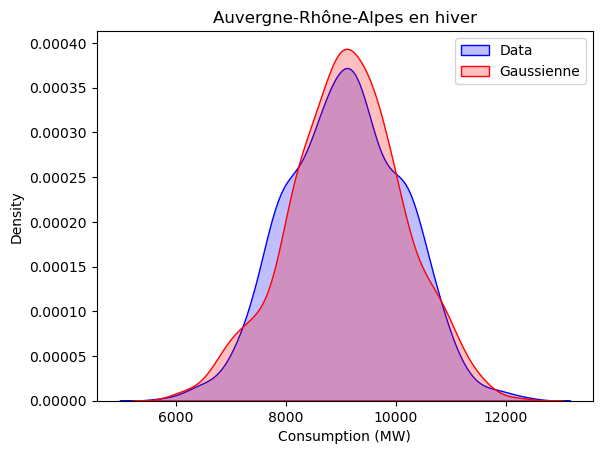

Sigma =  137261.9762149444
Mu =  2924.8133086876155


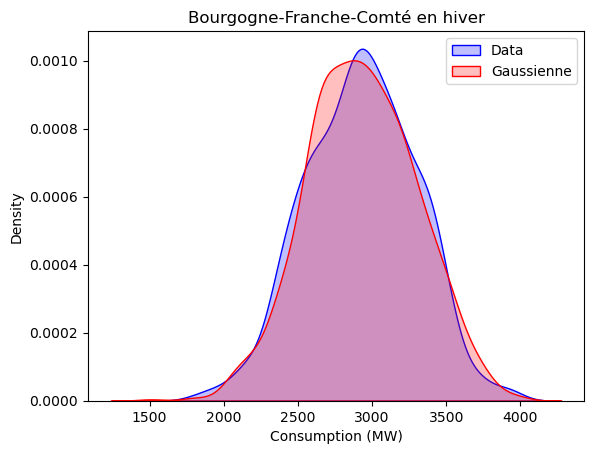

Sigma =  164979.9064431681
Mu =  3214.358595194085


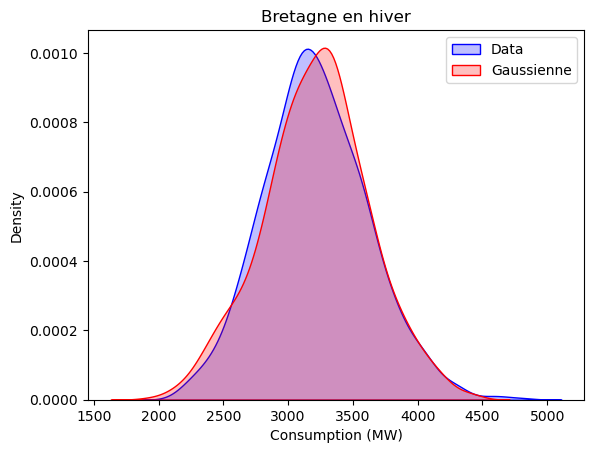

Sigma =  130645.73931596166
Mu =  2718.5166358595193


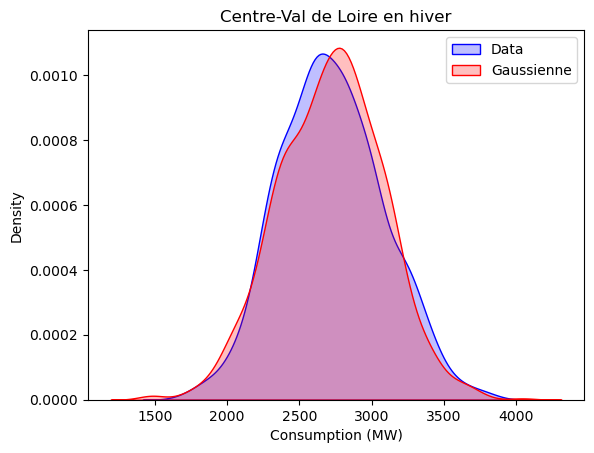

Sigma =  514463.63697695534
Mu =  6063.0933456561925


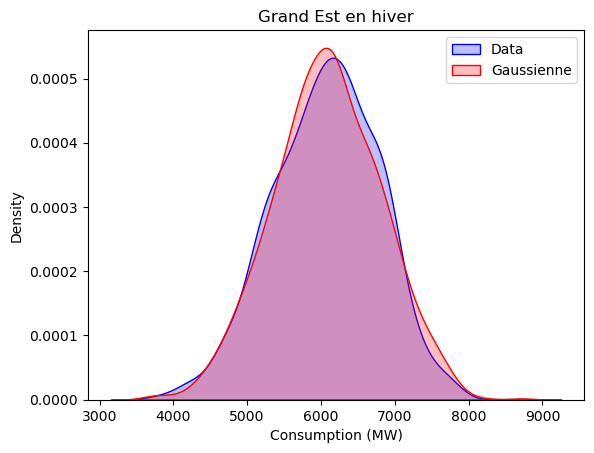

Sigma =  519471.4650499897
Mu =  6758.645101663586


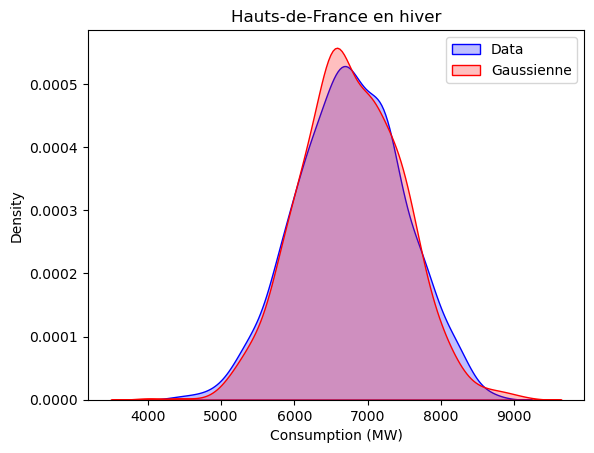

Sigma =  214617.15967791853
Mu =  3898.52865064695


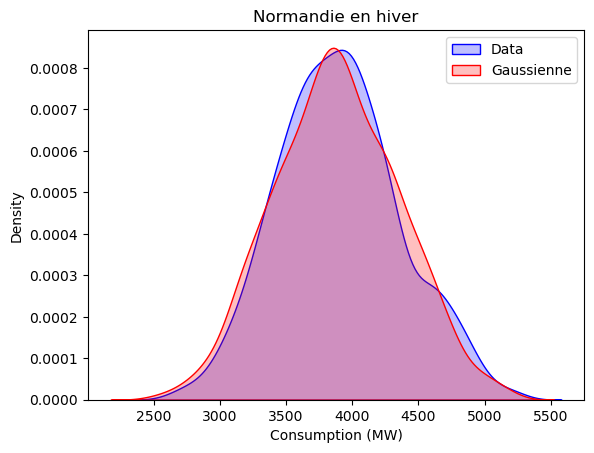

Sigma =  625980.1912525372
Mu =  6081.387245841035


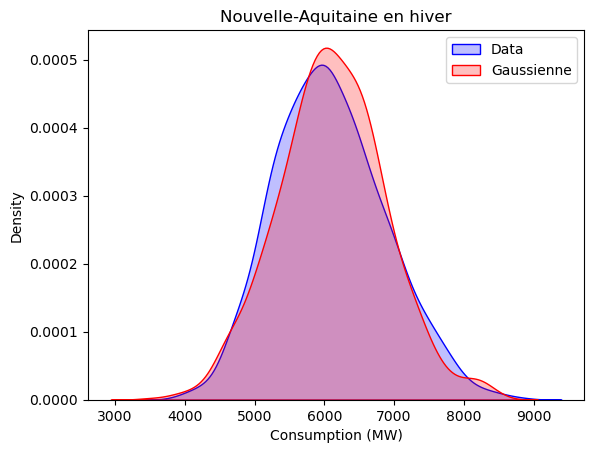

Sigma =  542211.379116858
Mu =  5312.215341959334


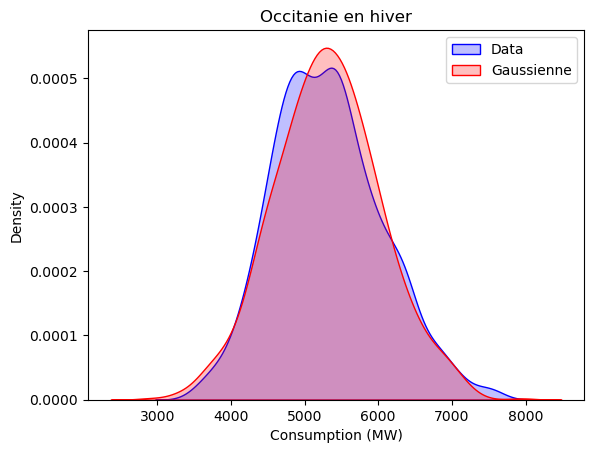

Sigma =  287232.531632756
Mu =  3841.4048059149723


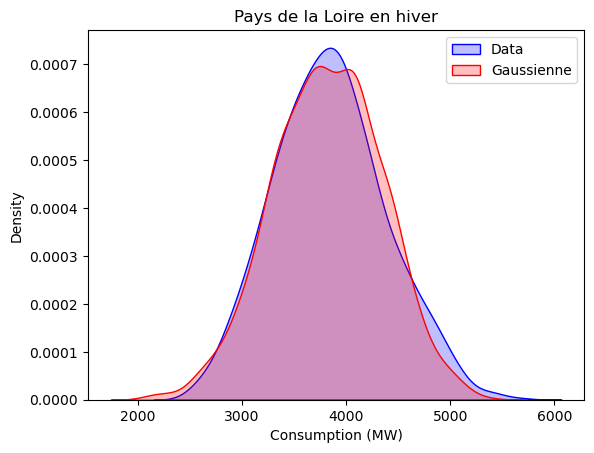

Sigma =  368139.75409911753
Mu =  5612.327171903882


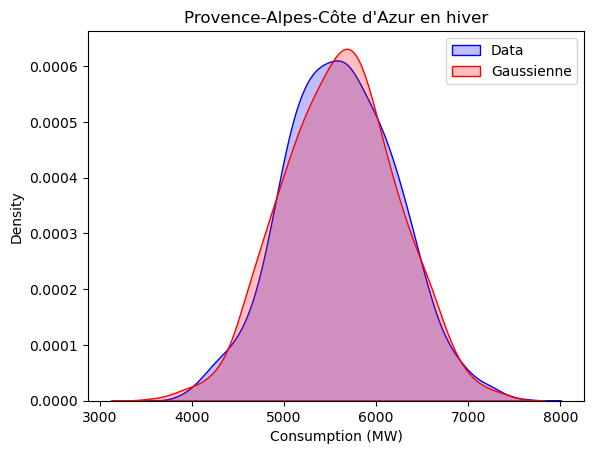

Sigma =  1762542.6039223967
Mu =  9992.35212569316


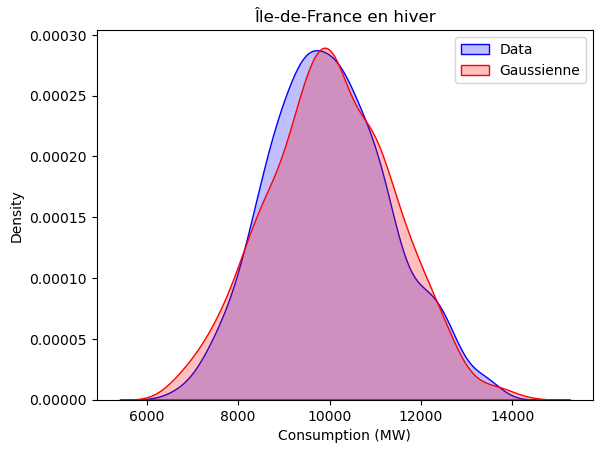

In [155]:
def isWinter (date):
    date_array = [int(numeric_string) for numeric_string in date.split('-')]
    if (date_array[1] == 12 and date_array[2] >= 12):
        return True
    elif (date_array[1] < 3):
        return True
    elif (date_array[1] == 3 and date_array[2] <=21):
        return True
    return False
for region in regions:
    df_region = df[df.region == region]
    winter = df_region.loc[df_region['date'].apply(isWinter)]

    x_i = winter["consumption"]
    sample_size = x_i.count()
    mu = x_i.sum() / sample_size

    sigma = (1 / (sample_size-1)) * ((x_i - mu)**2).sum()

    print ('Sigma = ',sigma)
    print('Mu = ',mu)

    gaussian_data = np.random.normal(mu, np.sqrt(sigma), sample_size)

    sns.kdeplot(data=winter, x="consumption", label="Data", color='blue', fill=True)
    sns.kdeplot(data=gaussian_data, label="Gaussienne", color='red', fill=True)
    plt.title( f"{region} en hiver")
    plt.xlabel("Consumption (MW)")
    plt.legend() 
    plt.show()


## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $\sigma=400$MW. Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0=3500$MW et l'écart-type $\sigma_0=500$MW.

1. Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

Votre réponse : 

Voici la fomule pour obtenir la loi a posteriori : 
$$
P(\mu | \text{données}) = \frac{P(\mu) \cdot P(\text{données} | \mu)}{\int P(\mu) \cdot P(\text{données} | \mu) \, d\mu}
$$

- $P(\mu | \text{données})$ est la loi a posteriori.
- $P(\mu)$ est la loi a priori sur la variable ($\mu$) définie par $P(\mu) = \frac{1}{{\sqrt{2\pi} \cdot \sigma_0}} \exp(-\frac{(\mu - \mu_0)^2}{2\sigma_0^2})$
- $P(\text{données} | \mu)$ est la fonction de vraisemblance : $P(\text{données} | \mu) = \frac{1}{{\sqrt{2\pi} \cdot \sigma}} \exp\left(-\frac{1}{{2\sigma^2}}\sum_{i=1}^{n} (x_i - \mu)^2\right)$


En effectuant les calcules, on obtient la loi a posteriori proportionnel (sans l'intégrale de normalisation) qui est suffisante pour obtenir les valeurs de $\mu$ :
$$
P(\mu | x_1, x_2, \ldots, x_n) \propto \exp\left(-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}\right) \exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^{n} (x_i - \mu)^2\right)
$$

La moyenne de cette gaussienne est donnée par : 

$$
\mu = \frac{\frac{\mu_0}{\sigma_0^2} + \frac{S}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}
$$

Et sa variance: 
$$
\sigma_{\text{post}}^2 = \frac 1 { \frac{1}{\sigma_0} + \frac{n}{\sigma^2}}
$$

- S étant la somme des $x_i$

2. Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée independament, dans un seul dataframe.

In [130]:
mu0 = 3500
sigma0 = 500**2
sigma =400**2

def isWinter (date, year):
    date_array = [int(numeric_string) for numeric_string in date.split('-')]
    if (date_array[1] == 12 and date_array[2] >= 12 and int(year)-1 == date_array[0]):
        return True
    elif (date_array[1] < 3 and int(year) == date_array[0]):
        return True
    elif (date_array[1] == 3 and date_array[2] <=21 and int(year) == date_array[0]):
        return True
    return False

def getMu (somme, n):
    return ((mu0 / sigma0) + (somme / sigma) ) / ((1/sigma0) + (n / sigma))

def getSigma (n):
    return (1/((1/np.sqrt(sigma0)) + (n/sigma)))

years = ["2013", "2014" , "2015" , "2016" , "2017" , "2018", "2019", "2020", "2021", "2022", "2023"]
sigma_list = [] 
mu_list = []
df_bretagne = df[df.region == "Bretagne"]
for year in years :
    df_year = df_bretagne.loc[df_bretagne['date'].apply(lambda x : isWinter(x, year))]
    data = df_year["consumption"]
    mu_list.append(getMu(data.sum(), data.count()))
    sigma_list.append(getSigma(data.count()))
    
df_posteriori = pd.DataFrame({"Année" : years, "Moyenne": mu_list, "Variance" : sigma_list})

print(df_posteriori)


   Année      Moyenne    Variance
0   2013  3395.176091  400.000000
1   2014  3100.894277  380.952381
2   2015  3208.485692  380.952381
3   2016  3089.236521  380.047506
4   2017  3264.288553  380.952381
5   2018  3342.170111  380.952381
6   2019  3204.809221  380.952381
7   2020  3136.088154  380.047506
8   2021  3325.854531  380.952381
9   2022  3235.294118  380.952381
10  2023  3113.583068  380.952381


3. Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

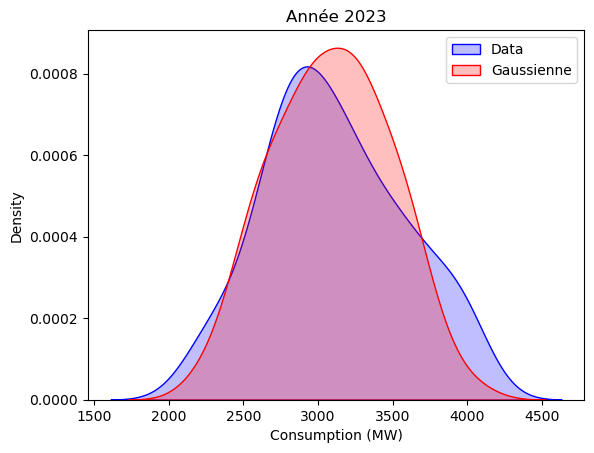

In [140]:
df_year_2023 = df_bretagne.loc[df_bretagne['date'].apply(lambda x : isWinter(x, "2023"))]
gaussian_data = np.random.normal(getMu(df_year_2023["consumption"].sum(), df_year_2023["consumption"].count()), (getSigma(df_year_2023["consumption"].count())), df_year_2023["consumption"].count())

np.random.seed(1234)
sns.kdeplot(data=df_year_2023, x="consumption", label="Data", color='blue', fill=True)
sns.kdeplot(data=gaussian_data, label="Gaussienne", color='red', fill=True)
plt.title( "Année 2023")
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

4. Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

Votre réponse :

## D. Test d'hypothèse

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous shouaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

1. Proposez la statisque du test pour un niveau $\alpha$.

Hypothèse $H_0$ : $\sigma_0 = 500$ MW contre hypothèse $H_1$ : $\sigma_1 = 400$ MW

On calcule le rapport de vraisemblance :
$$
RV (x) = \frac {\frac{1}{({\sqrt{2\pi} \cdot \sigma_0})^n} \exp\left(-\frac{1}{{2\sigma_0^2}}\sum_{i=1}^{n} (x_i - \mu)^2\right)} {\frac{1}{({\sqrt{2\pi} \cdot \sigma_1})^n} \exp\left(-\frac{1}{{2\sigma_1^2}}\sum_{i=1}^{n} (x_i - \mu)^2\right)}
$$
$$
= {\frac{\sigma_1^n}{\sigma_0^n} \exp\left((\frac{1}{{2\sigma_1^2}}-\frac{1}{{2\sigma_0^2}})\sum_{i=1}^{n} (x_i - \mu)^2\right)}
$$

Cette fonction est croissante en $\sum_{i=1}^{n} (x_i - \mu)^2$. D'après Neyman-Pearson, le test de rapport de vraisemblance correspond à $\delta = 1_{\sum_{i=1}^{n} (x_i - \mu)^2 < c_\alpha}(X)$

On remarque que $Y_i = \frac {x_i - \mu} {\sigma_0}$ suit une loi normale centrée réduite sous l'hypothèse $H_0$. On a donc que $\sum_{i=1}^{n} Y_i^2$ suit une loi du $\chi^2(n)$. On a donc $P(\sum_{i=1}^{n} Y_i^2 \geq q_{1-\alpha}) = \alpha$ avec $q_{1-\alpha}$ le quantile d'ordre $1-\alpha$ de la loi du $\chi^2(n)$. D'où $P(\sum_{i=1}^{n} (x_i - \mu)^2 \geq q_{1-\alpha} \sigma_0^2) = \alpha$, et donc $c_{\alpha} = q_{1-\alpha} \sigma_0^2$


2. Donnez le résultat de ce test pour $\alpha=1\%$.

In [168]:
from scipy.stats import chi2
def isWinter (date, year):
    date_array = [int(numeric_string) for numeric_string in date.split('-')]
    if (date_array[1] == 12 and date_array[2] >= 12 and int(year)-1 == date_array[0]):
        return True
    elif (date_array[1] < 3 and int(year) == date_array[0]):
        return True
    elif (date_array[1] == 3 and date_array[2] <=21 and int(year) == date_array[0]):
        return True
    return False

df_bretagne = df[df.region == "Bretagne"]
df_year_2023 = df_bretagne.loc[df_bretagne['date'].apply(lambda x : isWinter(x, "2023"))]
data = df_year_2023["consumption"]

n = data.count() 
alpha = 0.01
mu = 3200
quantile = chi2.ppf(1 - alpha, n)’
c = quantile * 500**2

sum_x = ((data - mu)**2).sum()

print(f"Le niveau d'acceptation de H0 est a {c} et la valeur de la somme est de {sum_x}. L'hypothèse est accépté si c < sum : {c < sum_x}")


Le niveau d'acceptation de H0 est a 33951680.79275669 et la valeur de la somme est de 22163247. L'hypothèse est accépté si c < sum : False


## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

1. Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

                           region        date  consumption
38030  Provence-Alpes-Côte d'Azur  2013-01-01         5369
38031  Provence-Alpes-Côte d'Azur  2013-01-02         5834
38032  Provence-Alpes-Côte d'Azur  2013-01-03         5948
38033  Provence-Alpes-Côte d'Azur  2013-01-04         5974
38034  Provence-Alpes-Côte d'Azur  2013-01-05         5580
...                           ...         ...          ...
41757  Provence-Alpes-Côte d'Azur  2023-03-17         4442
41758  Provence-Alpes-Côte d'Azur  2023-03-18         4258
41759  Provence-Alpes-Côte d'Azur  2023-03-19         4116
41760  Provence-Alpes-Côte d'Azur  2023-03-20         4257
41761  Provence-Alpes-Côte d'Azur  2023-03-21         4277

[1082 rows x 3 columns]
         region        date  consumption
7606   Bretagne  2013-01-01         2595
7607   Bretagne  2013-01-02         3195
7608   Bretagne  2013-01-03         3157
7609   Bretagne  2013-01-04         3142
7610   Bretagne  2013-01-05         2859
...         ...      

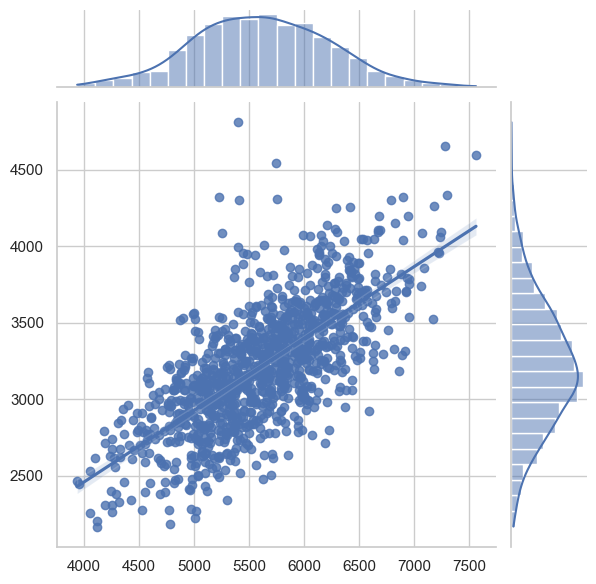

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def isWinter (date):
    date_array = [int(numeric_string) for numeric_string in date.split('-')]
    if (date_array[1] == 12 and date_array[2] >= 12):
        return True
    elif (date_array[1] < 3):
        return True
    elif (date_array[1] == 3 and date_array[2] <=21):
        return True
    return False

df_bretagne = df[df.region == "Bretagne"]
df_bretagne_winter = df_bretagne.loc[df_bretagne['date'].apply(lambda x : isWinter(x))]
df_PACA = df[df.region == "Provence-Alpes-Côte d'Azur"]
df_PACA_winter = df_PACA.loc[df_PACA['date'].apply(lambda x : isWinter(x))]

print(df_PACA_winter)
print(df_bretagne_winter)
sns.jointplot(x=df_PACA_winter["consumption"].to_numpy(), y=df_bretagne_winter["consumption"].to_numpy(), data=data, kind="reg")
plt.show()

2. Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

Votre réponse : Il semble que la consommation d'électricité dans ces deux régions soit fortement corrélée. Les points se regroupent près de la droite de régression ce qui laisse pensé qu'elles ne sont pas indépendantes.

3. Proposez le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau $\alpha$. 

Votre réponse :

On créer un table de contingence des deux données. Pour ce faire, on divise en deux catégories les données, haute consomation et faible consomation. On créer la table, en y ajoutant les fréquences attendu et on calcule les effectif attendus sous l'hypothèse $H_0$ : les lois sont indépendantes.
On peut à présent calculer la valeur de la statistique du chi2 :
$$
Chi_{obs}^2 = \sum_{i=1}^{lignes} \sum_{j=1}^{colonnes} \frac {(O_{ij} - C_{ij})^2} {C_{ij}}
$$

$O_{ij}$ sont les effectifs observés 
$C_{ij}$ sont les effectifs attenduent sous $H_0$

Nous sommes dans le cas du chi2 à un degré de liberté, donc la condition $\alpha \leq 0.01 $ est vérfiée pour $Chi_{obs}^2 \geq 6,635$ 

4. Donnez le résultat de ce test pour $\alpha=1\%$.

In [ ]:
PACA_data = df_PACA_winter["consumption"]
bretagne_data = df_bretagne_winter["consumption"]

milieu = (max(bretagne_data.max(), PACA_data.max()) + min(bretagne_data.min(),PACA_data.min()))/2
O = []
O.append([len(df_PACA_winter[df_PACA_winter.consumption < milieu]),len(df_PACA_winter[df_PACA_winter.consumption >= milieu])])
O.append([len(df_bretagne_winter[df_bretagne_winter.consumption < milieu]),len(df_bretagne_winter[df_bretagne_winter.consumption >= milieu])])

total = sum(O[0]) + sum(O[1])

C = []
C.append([(sum(O[0]) *(O[0][0]+O[1][0])) / total, (sum(O[0]) *(O[0][1]+O[1][1])) / total])
C.append([(sum(O[1]) *(O[0][0]+O[1][0])) / total, (sum(O[1]) *(O[0][1]+O[1][1])) / total])

X_obs = sum([((O[i//2][i%2]-C[i//2][i%2])**2)/C[i//2][i%2] for i in range(4)])

print("On rejette l'hypothèse H0, les lois ne sont pas indépendante")


On rejette l'hypothèse H0, les loi ne sont pas indépendante
